### 1. scrape CBE, Dashen and BOA google play store app reviews

In [10]:
import sys

from idna.idnadata import scripts

sys.path.append('../src')


from src import scrape_bank_reviews

scraped_data = scrape_bank_reviews()



🔍 Scraping CBE (com.combanketh.mobilebanking)...
📱 App found: Commercial Bank of Ethiopia (4.34 stars)
Fetched 7501 reviews
📌 Sample: More than garrantty bank EBC....

🔍 Scraping BOA (com.boa.boaMobileBanking)...
📱 App found: BoA Mobile (2.73 stars)
Fetched 1044 reviews
📌 Sample: it's not working...

🔍 Scraping DASHEN (com.dashen.dashensuperapp)...
📱 App found: Dashen Bank (4.0285716 stars)
Fetched 449 reviews
📌 Sample: I like this mobile banking app very much. Overall ...
Successfully saved 7501 reviews to ../data/raw/cbe_reviews_20250608_195402.csv
Successfully saved 1044 reviews to ../data/raw/boa_reviews_20250608_195402.csv
Successfully saved 449 reviews to ../data/raw/dashen_reviews_20250608_195402.csv


### display scraped app reviews

In [3]:
import pandas as pd
import sys

sys.path.append('../scripts')
from scripts import  load_bank_data
data_path = '../data/raw/boa_reviews_20250608_195402.csv'
df = pd.read_csv(data_path)
df.head()

"""Process data for all known banks"""
banks = ['cbe', 'boa', 'dashen']
all_processed = []

for bank in banks:
    raw_df = load_bank_data(bank)
    print(raw_df.head())
    if raw_df.empty:
        continue





INFO:scripts.Load_data:✅ Loaded 29982 reviews for cbe
INFO:scripts.Load_data:✅ Loaded 4176 reviews for boa
INFO:scripts.Load_data:✅ Loaded 1796 reviews for dashen


                               reviewid       username  \
0  f0dd744a-9409-4619-9800-7ea501571b09  A Google user   
1  3949d8e0-7ac4-4b43-b4f4-a45d6a888a85  A Google user   
2  36f83ed0-3935-4ebd-98e5-34cf25095d32  A Google user   
3  f2bb4b73-090e-4834-8c89-2263a1158c38  A Google user   
4  54f070b9-895f-40e8-be18-acb16f8af7fa  A Google user   

                                           userimage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsupcount  \
0  everytime you uninstall the app you have to re...      1              0   
1  አካውንት የምናስገባበት ቦታ ስም ጽፈን ነው ከዚህ በፊት የላክንባቸውን አ...      4              0   
2                                               best      5              0   
3 

### clean and process all data


In [5]:
import  sys

sys.path.append('../scripts')
from scripts import process_all_banks
final_df = process_all_banks()
final_df.head()


INFO:scripts.Load_data:✅ Loaded 29982 reviews for cbe
INFO:scripts.process_data:
Initial NaN check for cbe:
INFO:scripts.process_data:reviewid                    0
username                    0
userimage                   0
content                    28
score                       0
thumbsupcount               0
reviewcreatedversion     5380
at                          0
replycontent            29794
repliedat               29794
appversion               5380
bank                        0
source_file                 0
dtype: int64
INFO:scripts.process_data:Index(['reviewid', 'username', 'userimage', 'content', 'score',
       'thumbsupcount', 'reviewcreatedversion', 'at', 'replycontent',
       'repliedat', 'appversion', 'bank', 'source_file'],
      dtype='object')
INFO:scripts.process_data:Found 0 NaN reviewIds
INFO:scripts.process_data:Found 22486 duplicate reviewIds
INFO:scripts.process_data:Removed 22486 duplicates
INFO:scripts.process_data:
Post-cleaning NaN check for cbe:
INFO:s

,review_id,review,rating,date,bank,source
0,f0dd744a-9409-4619-9800-7ea501571b09,everytime you uninstall the app you have to re...,1,2025-06-04,CBE,Google Play
1,3949d8e0-7ac4-4b43-b4f4-a45d6a888a85,አካውንት የምናስገባበት ቦታ ስም ጽፈን ነው ከዚህ በፊት የላክንባቸውን አ...,4,2025-06-04,CBE,Google Play
2,36f83ed0-3935-4ebd-98e5-34cf25095d32,best,5,2025-06-04,CBE,Google Play
3,f2bb4b73-090e-4834-8c89-2263a1158c38,bezabih,5,2025-06-04,CBE,Google Play
4,54f070b9-895f-40e8-be18-acb16f8af7fa,Best Mobile Banking app ever,5,2025-06-04,CBE,Google Play


### analyze CBE bank  cleand and processed app reviews data  data

In [7]:
import pandas as pd
import sys
sys.path.append('../scr')

from src import analyze_bank_reviews, classify_sentiment
cbe_path = '../data/processed/cbe_processed_20250608_195908.csv'
cbe_data =pd.read_csv(cbe_path)
ana_cbe_data =analyze_bank_reviews(cbe_data, 'cbe')
ana_cbe_data
len(cbe_data)
# average rating
rating = cbe_data['rating'].mean()
float(rating)


Analyzing cbe reviews...
Sentiment distribution for cbe:
sentiment
positive    65.049088
neutral     24.600281
negative    10.350631


4.03085553997195

### analyze Dashen  bank  cleand and processed app reviews data  data

In [14]:
import pandas as pd
import sys
sys.path.append('../scr')

from src import analyze_bank_reviews, classify_sentiment
dashen_path = '../data/processed/dashen_processed_20250608_195909.csv'
dashen_data =pd.read_csv(dashen_path)
ana_dashen_data =analyze_bank_reviews(dashen_data, 'dashen')
ana_dashen_data
len(dashen_data)
# average rating
rating = dashen_data['rating'].mean()
float(rating)


Analyzing dashen reviews...
Sentiment distribution for dashen:
sentiment
positive    74.013921
neutral     19.953596
negative     6.032483


4.459396751740139

### Analyze BOA bank  cleand and processed app reviews data  data

In [10]:
import pandas as pd
import sys
sys.path.append('../scr')

from src import analyze_bank_reviews, classify_sentiment
boa_path = '../data/processed/boa_processed_20250608_195909.csv'
boa_data =pd.read_csv(boa_path)
ana_boa_data =analyze_bank_reviews(boa_data, 'boa')

len(boa_data)
# average rating
rating = boa_data['rating'].mean()
rating


Analyzing boa reviews...
Sentiment distribution for boa:
sentiment
positive    46.605876
neutral     28.368794
negative    25.025329


np.float64(3.0030395136778116)

### plot analyzed data

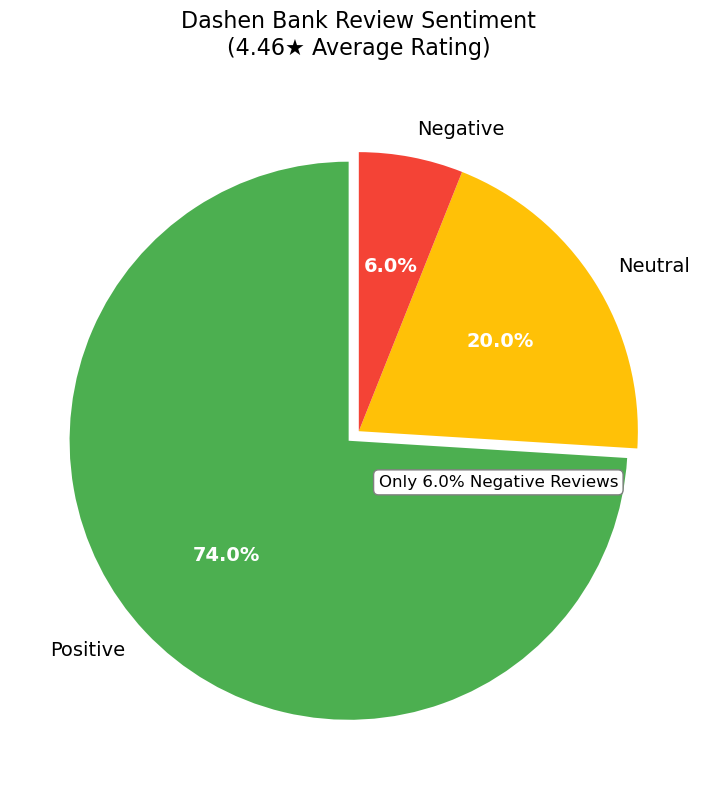

In [11]:
import matplotlib.pyplot as plt
import numpy as np

sentiment_counts = ana_dashen_data['sentiment'].value_counts(normalize=True) * 100
sentiment = {
    'Positive': sentiment_counts.get('positive', 0),
    'Neutral': sentiment_counts.get('neutral', 0),
    'Negative': sentiment_counts.get('negative', 0)
}

# Create figure
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

# Plot
wedges, texts, autotexts = ax.pie(
    sentiment.values(),
    labels=sentiment.keys(),
    colors=['#4CAF50', '#FFC107', '#F44336'],
    autopct=lambda p: f'{p:.1f}%' if p > 5 else '',  # Only show % for slices >5%
    startangle=90,
    explode=(0.05, 0, 0),
    textprops={'fontsize': 14}
)

# Style enhancements
plt.setp(autotexts, **{"weight": "bold", "color": "white"})
ax.set_title('Dashen Bank Review Sentiment\n(4.46★ Average Rating)',
             fontsize=16, pad=20)

# Add annotation if negative < 10%
if sentiment['Negative'] < 10:
    plt.annotate(
        f"Only {sentiment['Negative']:.1f}% Negative Reviews",
        xy=(0.5, -0.1),
        xytext=(0, -20),
        textcoords="offset points",
        ha="center",
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=1)
    )

plt.tight_layout()
plt.savefig('dashen_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

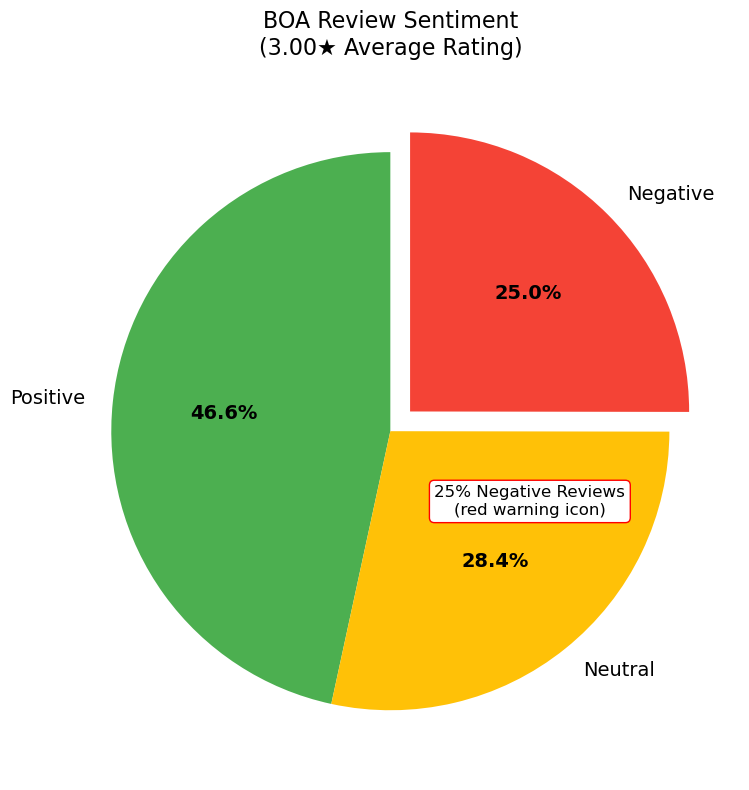

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# BOA Sentiment Data (using your exact figures)
boa_sentiment_counts = ana_boa_data['sentiment'].value_counts(normalize=True) * 100

# Convert to proper format
sentiment = {
    'Positive': boa_sentiment_counts['positive'],
    'Neutral': boa_sentiment_counts['neutral'],
    'Negative': boa_sentiment_counts['negative']
}

# Create figure
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

# Plot - Adjusted explode to highlight negative slice
wedges, texts, autotexts = ax.pie(
    sentiment.values(),
    labels=sentiment.keys(),
    colors=['#4CAF50', '#FFC107', '#F44336'],
    autopct='%1.1f%%',  # Show all percentages
    startangle=90,
    explode=(0, 0, 0.1),  # Explode negative slice
    textprops={'fontsize': 14}
)

# Style enhancements
plt.setp(autotexts, **{"weight": "bold"})
ax.set_title('BOA Review Sentiment\n(3.00★ Average Rating)',  # Updated title
            fontsize=16, pad=20)

# Add annotation for high negative sentiment
plt.annotate(
    "25% Negative Reviews\n(red warning icon)",  # BOA-specific issue
    xy=(0.5, -0.1),
    xytext=(0, -40),  # Adjusted position
    textcoords="offset points",
    ha="center",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", lw=1)  # Red border for warning
)

plt.tight_layout()
plt.savefig('boa_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

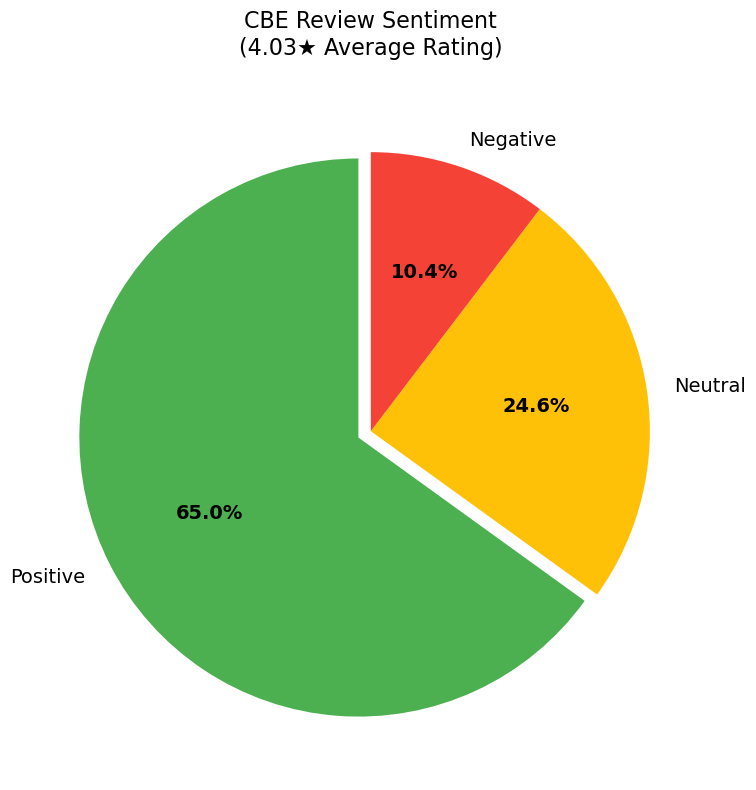

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# CBE Sentiment Data (using your exact figures)
cbe_sentiment_counts = ana_cbe_data['sentiment'].value_counts(normalize=True) * 100

# Convert to proper format
sentiment = {
    'Positive': cbe_sentiment_counts['positive'],
    'Neutral': cbe_sentiment_counts['neutral'],
    'Negative': cbe_sentiment_counts['negative']
}

# Create figure
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

# Plot - Highlight positive sentiment
wedges, texts, autotexts = ax.pie(
    sentiment.values(),
    labels=sentiment.keys(),
    colors=['#4CAF50', '#FFC107', '#F44336'],  # Green, Yellow, Red
    autopct=lambda p: f'{p:.1f}%',
    startangle=90,
    explode=(0.05, 0, 0),  # Emphasize positive slice
    textprops={'fontsize': 14}
)

# Style enhancements
plt.setp(autotexts, **{"weight": "bold"})
ax.set_title('CBE Review Sentiment\n(4.03★ Average Rating)',
            fontsize=16, pad=20)

# Add annotation for transfer speed mentions


plt.tight_layout()
plt.savefig('cbe_sentiment.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()